In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import os
pathorig = '/Users/raiziel/'
os.chdir(pathorig) 

In [597]:
# Initial Conditions
L = 1 # Pendulum rod length(m)
m = 1 # mass of pendulum bob (kg)
w = 1 # drive frequency(s-1)
A = 1 # drive amplitude(m)
g = 9.81 # gravity(m/s^2)
alpha = 0 # damping coefficient
y0 = [2.4,0] # Initial Conditions; theta, dtheta/dt 
#z0 = [2.4+dz,0] # Initial Conditions; ztheta, zdtheta/dt
tmax, dt = 30, 0.01 # Maximum Time, Time Point Spacing (s)
t = np.arange(0, tmax+dt, dt) # Time Grid(s)

# Small changes in intial conditions
dz = 1e-4   # change in ztheta
dw = .8   # change in drive frequency
dA = .5  # change in drive amplitude
dalpha = 0.330 # change in damping coefficient

z0 = [2.4+dz,0] # Initial Conditions; ztheta, zdtheta/dt
w = w + dw
A = A + dA    
alpha = alpha + dalpha





In [598]:
def Initial(y,yprime):
    # Conditional to avoid ln(0) error and add a small value 
    if ((y-yprime).all()==0):
        plt.plot(np.log(np.abs(y-yprime)+0.0000001))
        plt.xlabel('time, t(s)')
        plt.ylabel('ΔΦ(t)')
        plt.title("Observation of Changes with Differences in Initial Conditions")
    
    else:
        plt.plot(np.log(np.abs(y-yprime)))
        plt.xlabel('time, t(s)')
        plt.ylabel('ΔΦ(t)')
        plt.title("Observation of Changes with Differences in Initial Conditions")

In [599]:
def deriv(y, t, L, w, A, m):
    """Return the first derivatives of y = theta, z1, L, z2."""
    theta, thetadot = y
    
    
    dtheta_dt = thetadot 
    # thetadot = -(Torque of the weight) - (Resistive Force + Driving Force)
    dthetadot_dt = -g/L*np.sin(theta) - ((alpha*dtheta_dt + A*np.cos(w*t))/m*L*L)
    
    
    return dtheta_dt, dthetadot_dt



# Do the numerical integration of the equations of motion

y = odeint(deriv, y0, t, args=(L, w, A, m))


# Unpack theta and thetadot as a function of time

theta, thetadot = y[:,0], y[:,1]

# Convert to Cartesian coordinates of the two bob positions.

x = L * np.sin(theta)
y = -L * np.cos(theta)






In [600]:
def zderiv(z, t, L, w, A, m):
    """Return the first derivatives of y = theta, z1, L, z2."""
    ztheta, zthetadot = z
    
    
    zdtheta_dt = zthetadot
    # zthetadot = -(Torque of the weight of m) - (Resistive Force + Driving Force
    zdthetadot_dt = -g/L*np.sin(ztheta) - ((alpha*zdtheta_dt + A*np.cos(w*t))/m*L*L)
    
    
    return zdtheta_dt, zdthetadot_dt



# Do the numerical integration of the equations of motion 

z = odeint(zderiv, z0, t, args=(L, w, A, m))


# Unpack ztheta and zthetadot as a function of time

ztheta, zthetadot = z[:,0], z[:,1]

# Convert to Cartesian coordinates of the two bob positions.

x = L * np.sin(ztheta)
z = -L * np.cos(ztheta)







Text(0.5, 1.0, 'Damped Driven Pendulum #1 ')

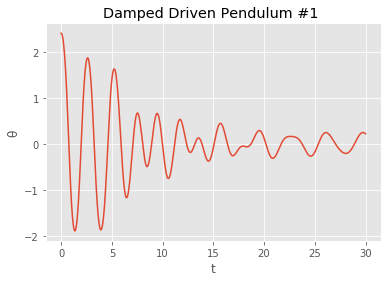

In [607]:
plt.plot(t,theta)
plt.xlabel("t")
plt.ylabel("θ")
plt.title("Damped Driven Pendulum #1 ")

Text(0.5, 1.0, 'Damped Driven Pendulum #2 ')

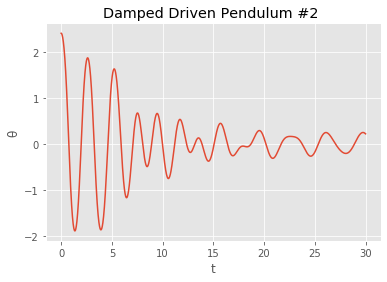

In [606]:
plt.plot(t,ztheta)
plt.xlabel("t")
plt.ylabel("θ")
plt.title("Damped Driven Pendulum #2 ")

Text(0.5, 1.0, 'Damped Driven Pendulum #1')

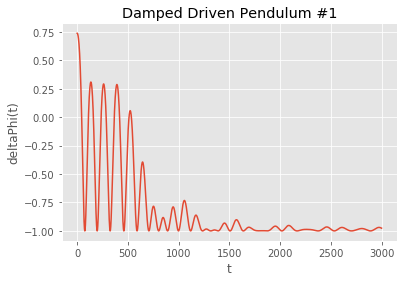

In [605]:
plt.plot(y)
plt.xlabel("t")
plt.ylabel("deltaPhi(t)")
plt.title("Damped Driven Pendulum #1")

Text(0.5, 1.0, 'Damped Driven Pendulum #2')

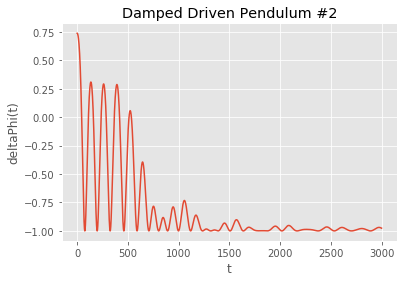

In [604]:
plt.plot(z)
plt.xlabel("t")
plt.ylabel("deltaPhi(t)")
plt.title("Damped Driven Pendulum #2")

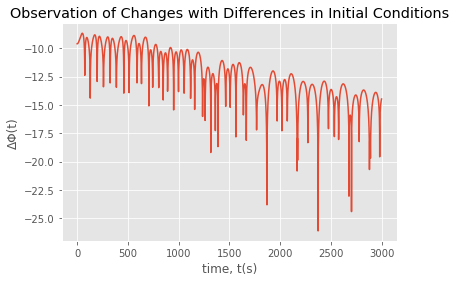

In [603]:
Initial(y,z)

In [244]:
# Questions / Comments
# In our project, is the state space diagram just a nice picture that doesn't tell a good and accurate story?
# How does chaos become applicable? There seems to be more non-chaotic regions for the singular damped driven pendulum
# Do we assume that in application that we can account for the non-chaotic behaviors in which we can predict
# but we set in place conditions or systems that can handle chaotic behavior too?

# Notes
# 2.3 & 2.4 for theta seemed sensitive 

In [615]:
import matplotlib.pyplot as plt
import numpy as np

# use ggplot style for more sophisticated visuals
plt.style.use('ggplot')

def live_plotter(x_vec,y1_data,line1,identifier='',pause_time=0.1):
    if line1==[]:
        # this is the call to matplotlib that allows dynamic plotting
        plt.ion()
        fig = plt.figure(figsize=(13,6))
        ax = fig.add_subplot(111)
        # create a variable for the line so we can later update it
        line1, = ax.plot(x_vec,y1_data,'-o',alpha=0.8)        
        #update plot label/title
        plt.xlabel("time, t(s)")
        plt.ylabel('ΔΦ(t)')
        plt.title('Title: {}'.format(identifier))
        plt.show()
    
    # after the figure, axis, and line are created, we only need to update the y-data
    line1.set_ydata(y1_data)
    # adjust limits if new data goes beyond bounds
    if np.min(y1_data)<=line1.axes.get_ylim()[0] or np.max(y1_data)>=line1.axes.get_ylim()[1]:
        plt.ylim([np.min(y1_data)-np.std(y1_data),np.max(y1_data)+np.std(y1_data)])
    # this pauses the data so the figure/axis can catch up - the amount of pause can be altered above
    plt.pause(pause_time)
    
    # return line so we can update it again in the next iteration
    return line1

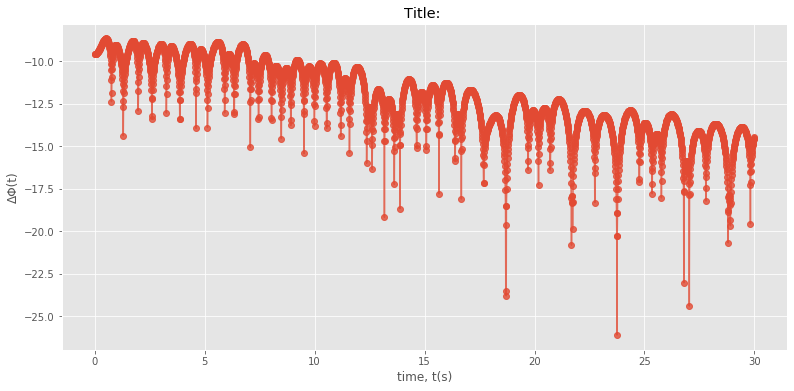

In [618]:
live_plotter(t,np.log(np.abs(y-z)),line1=[],identifier='',pause_time=0.1)

